<a href="https://colab.research.google.com/github/s34836/EWD/blob/main/lab7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tasks (Lab 07)
1. Load the [`boston.csv` dataset](https://www.rdocumentation.org/packages/MASS/versions/7.3-58.3/topics/Boston) and model the relationship between the median house value (`medv`) and other variables.
    - Select a model manually. Compare 4-5 different single-variable and multi-variable models. It may be helpful to visualize the dataset's correlation matrix.
    - Perform model diagnostics.
        - In model summaries, observe the $R^2$, coefficients and their $p$-values.
        - Create residual plots.
    - Write down your conclusions.
## Tasks (Lab 08)
1. Create non-linear (for example polynomial) models and models with interaction terms for the `boston` dataset. Compare them to models created in the previous task.
2. Implement the forward selection method. You can use the Adjusted `R^2` metric or a validation set to evaluate/select models.
3. Load the `housing.csv` dataset and:
    - Remove rows containing missing values (or fill them in with the mean).
    - One-hot encode the `ocean_proximity` variable using `pd.get_dummies()`.
    - Model the dependence of `median_house_value` on `ocean_proximity`.

In [42]:
boston_df_raw = pd.read_csv('boston.csv')
df = boston_df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


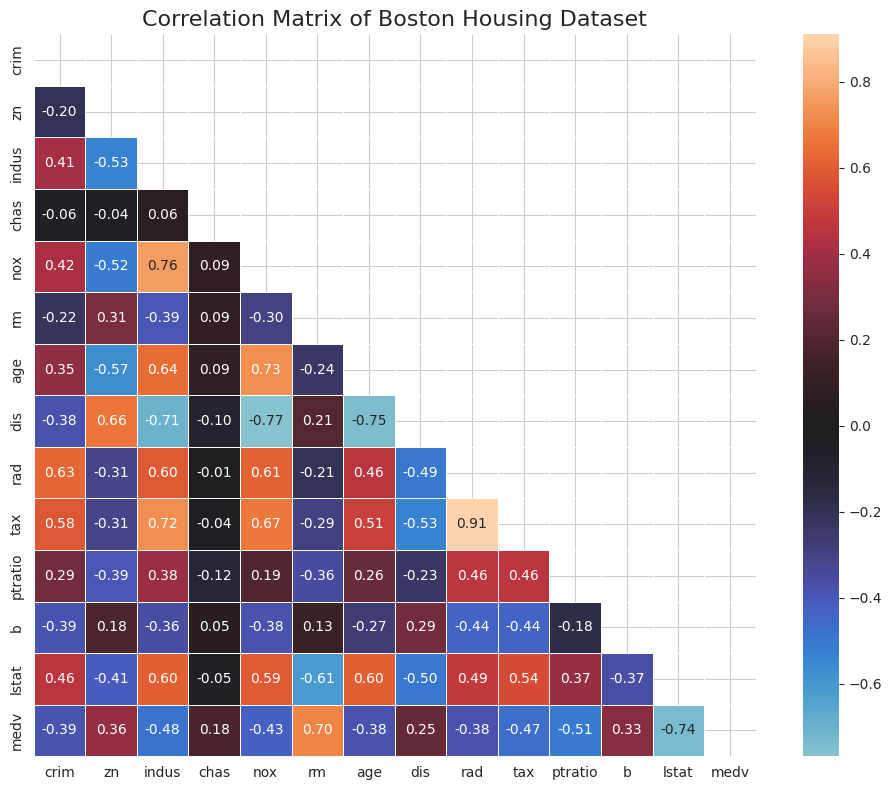

In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.gridspec import GridSpec


correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f",
            square=True, linewidths=.5, center=0)
plt.title('Correlation Matrix of Boston Housing Dataset', fontsize=16)
plt.tight_layout()
plt.show()



FROM: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [45]:

# Model 1: Prosta regresja liniowa z rm (średnia liczba pokoi)
# 'rm' ma najsilniejszą dodatnią korelację (0,70) z medv
# Jest model bazowy wykorzystujący najlepszy pojedynczy predyktor dodatni
# No i domy z większą liczbą pokoi są zazwyczaj większe i droższe
model1 = smf.ols(formula='medv ~ rm', data=df).fit()
print("\n----- Model 1: medv ~ rm -----")
print(model1.summary())


----- Model 1: medv ~ rm -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.49e-74
Time:                        08:16:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.670

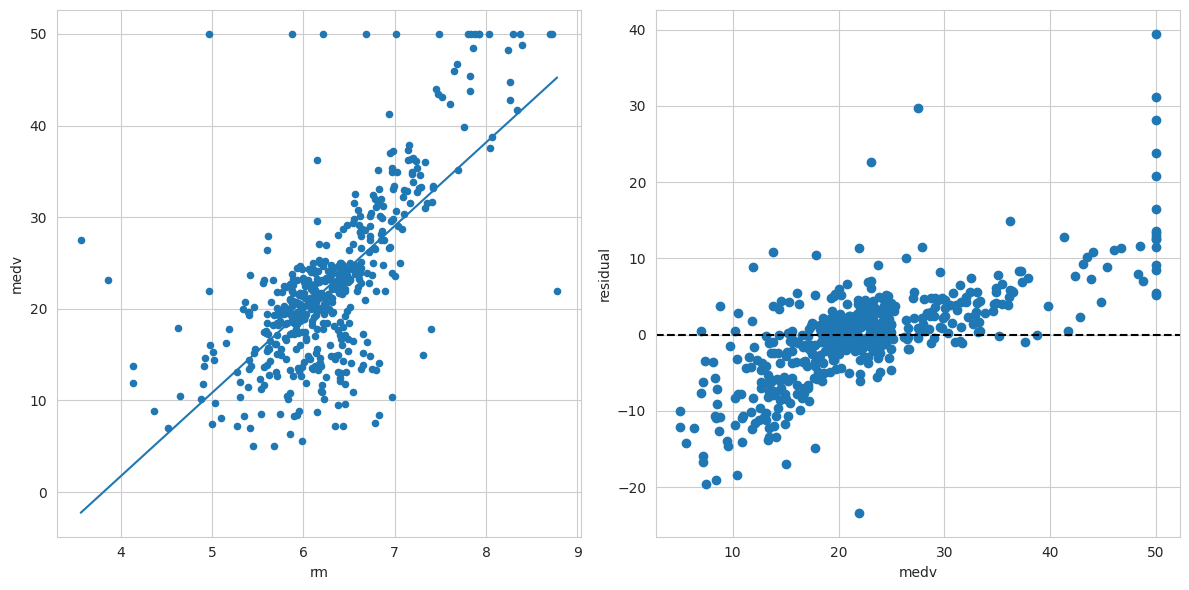

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Scatter with linear fit from Model 1
df.plot(kind='scatter', y='medv', x='rm', ax=ax1)
x_plot = np.linspace(df.rm.min(), df.rm.max(), 100)
b0, b1 = model1.params  # Using your existing model1
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot)

# Right plot: Residuals
ax2.scatter(df.medv, model1.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residual')

plt.tight_layout()
plt.show()

The residuals indicate a non-linear relationship (Residuals are not random).

In [29]:
# Model 2: Prosta regresja liniowa z lstat (% populacji o niższym statusie)
# - Używamy 'lstat', ponieważ ma najsilniejszą ujemną korelację (-0,74) z medv
# - Jest to nasz model bazowy wykorzystujący najlepszy pojedynczy predyktor ujemny
# - SES okolicy silnie wpływa na wartość nieruchomości
model2 = smf.ols(formula='medv ~ lstat', data=df).fit()
print("\n----- Model 2: medv ~ lstat -----")
print(model2.summary())




----- Model 2: medv ~ lstat -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.08e-88
Time:                        08:04:17   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.

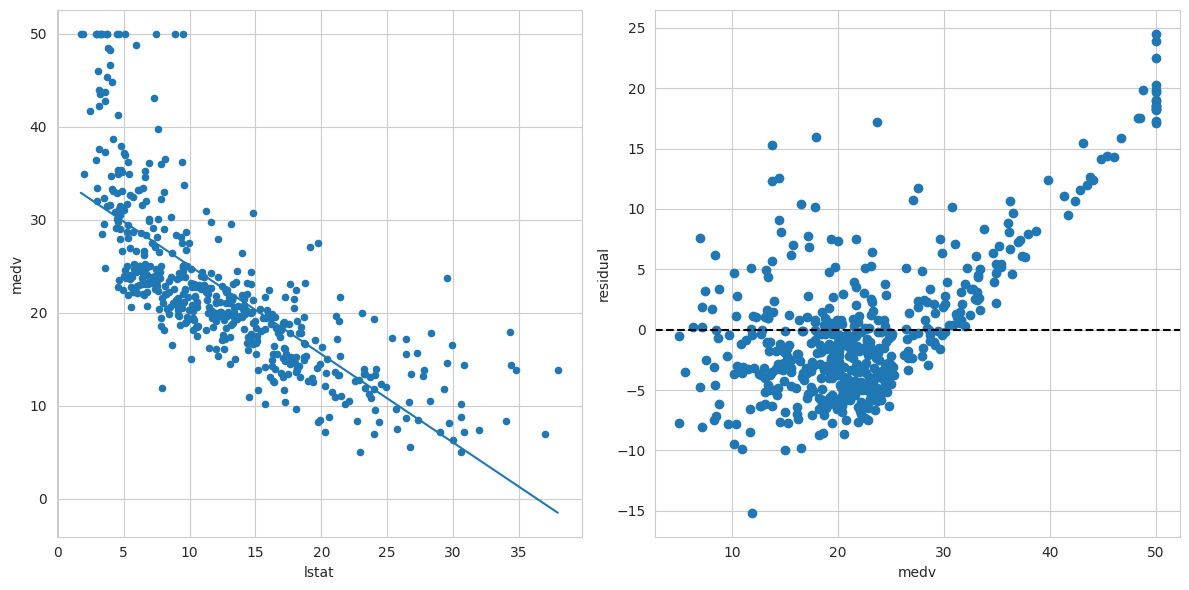

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Scatter with linear fit from Model 2
df.plot(kind='scatter', y='medv', x='lstat', ax=ax1)
x_plot = np.linspace(df.lstat.min(), df.lstat.max(), 100)
b0, b1 = model2.params
y_plot = b0 + b1 * x_plot
ax1.plot(x_plot, y_plot)

# Right plot: Residuals
ax2.scatter(df.medv, model2.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('residual')

plt.tight_layout()
plt.show()

In [14]:
# Model 3: Wielokrotna regresja liniowa z rm i lstat
# - Łączymy dwa najsilniejsze predyktory (jeden dodatni, jeden ujemny)
# - Te czynniki reprezentują różne aspekty: fizyczne cechy domu (rm) i
#   demografię okolicy (lstat)
# - Sprawdzamy, czy połączenie tych uzupełniających się czynników poprawia predykcję
model3 = smf.ols(formula='medv ~ rm + lstat', data=df).fit()
print("\n----- Model 3: medv ~ rm + lstat -----")
print(model3.summary())




----- Model 3: medv ~ rm + lstat -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          7.01e-112
Time:                        07:27:07   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [57]:
# Model 4: Wielokrotna regresja liniowa z rm, lstat i ptratio
# - Dodajemy 'ptratio' (stosunek liczby uczniów do nauczycieli), który ma znaczną ujemną korelację (-0,51)
# - Jakość szkół jest często istotnym czynnikiem na rynku nieruchomości w USA
# - Sprawdzamy, czy wskaźniki edukacyjne dostarczają dodatkowej mocy predykcyjnej poza
#   charakterystyką domu i demografią okolicy
model4 = smf.ols(formula='medv ~ rm + lstat + ptratio', data=df).fit()
print("\n----- Model 4: medv ~ rm + lstat + ptratio -----")
print(model4.summary())




----- Model 4: medv ~ rm + lstat + ptratio -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          2.69e-123
Time:                        08:30:58   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

In [58]:
# Model 5: Wielokrotna regresja liniowa ze wszystkimi zmiennymi mającymi korelację > 0,4 z medv
# - Kompleksowy model uwzględniający czynniki środowiskowe (nox), ekonomiczne (tax),
#   oraz obecność przemysłu (indus)
# - Sprawdzamy, czy bardziej złożony model uwzględniający różnorodne charakterystyki okolicy
#   zapewnia znaczącą poprawę
# - Zawiera zmienne, które mogą mieć interakcje lub współliniowość
model5 = smf.ols(formula='medv ~ rm + lstat + ptratio + indus + nox + tax', data=df).fit()
print("\n----- Model 5: medv ~ rm + lstat + ptratio + indus + nox + tax -----")
print(model5.summary())




----- Model 5: medv ~ rm + lstat + ptratio + indus + nox + tax -----
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          2.26e-120
Time:                        08:31:04   Log-Likelihood:                -1551.2
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     499   BIC:                             3146.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [62]:
# Tworzenie tabeli porównawczej dla wszystkich modeli
# - R-kwadrat: proporcja wyjaśnionej wariancji (wyższa jest lepsza)
# - Skorygowany R-kwadrat: R-kwadrat skorygowany o liczbę predyktorów (wyższy jest lepszy)
# - AIC/BIC: Kryteria informacyjne do wyboru modelu (niższe są lepsze)
# - Te metryki pomagają nam zrównoważyć złożoność modelu i moc wyjaśniającą

def format_pvalue(p):
    if p < 0.001:
        return "<.001"
    else:
        return f"{p:.3f}"

models_comparison = pd.DataFrame({
    'Model': ['rm', 'lstat', 'rm + lstat', 'rm + lstat + ptratio',
              'rm + lstat + ptratio + indus + nox + tax'],
    'R-kwadrat': [model1.rsquared, model2.rsquared, model3.rsquared,
                 model4.rsquared, model5.rsquared],
    'Skorygowany R-kwadrat': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj,
                             model4.rsquared_adj, model5.rsquared_adj],
    'AIC': [model1.aic, model2.aic, model3.aic, model4.aic, model5.aic],
    'BIC': [model1.bic, model2.bic, model3.bic, model4.bic, model5.bic],
    'p-value': [model1.f_pvalue, model2.f_pvalue, model3.f_pvalue, model4.f_pvalue, model5.f_pvalue]
})


# Format p-values to be more readable
models_comparison['p-value'] = models_comparison['p-value'].apply(format_pvalue)


print("\nPorównanie modeli:")
print(models_comparison)

# Po porównaniu tych modeli, wybierzemy najlepszy na podstawie:
# 1. Najwyższy skorygowany R-kwadrat (uwzględnia złożoność modelu)
# 2. Najniższe wartości AIC/BIC
# 3. Istotność statystyczna współczynników
# 4. Brak współliniowości w predyktorach


Porównanie modeli:
                                      Model  R-kwadrat  Skorygowany R-kwadrat  \
0                                        rm   0.483525               0.482501   
1                                     lstat   0.544146               0.543242   
2                                rm + lstat   0.638562               0.637124   
3                      rm + lstat + ptratio   0.678624               0.676704   
4  rm + lstat + ptratio + indus + nox + tax   0.681022               0.677186   

           AIC          BIC p-value  
0  3350.151117  3358.604191   <.001  
1  3286.974957  3295.428030   <.001  
2  3171.542314  3184.221924   <.001  
3  3114.097267  3131.003414   <.001  
4  3116.308158  3145.893914   <.001  


rm + lstat + ptratio - the best

